# WeatherPy Analysis

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Today's date
today = date.today()

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'Weather_Output/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'Total cities collected: {len(cities)}.')

Total cities collected: 636.


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Identify base url for API call and units we want data to be displayed in
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Build partial query URL
query_url = f'{url}appid={weather_api_key}&units={units}&q='

In [4]:
# Create blank DataFrame with desired columns headers and cities identified
weather_df = pd.DataFrame({'City': cities, 'Lat': '', 'Lng': '', 'Max Temp': '', 'Humidity': '', 
                           'Cloudiness': '', 'Wind Speed': '', 'Country': '', 'Date': ''})
weather_df

record_num = 1
set_num = 1

for index, row in weather_df.iterrows():
    
    city_query = query_url + row['City']
    response = requests.get(city_query).json()

    try:
        print(f'Processing Record {record_num} of Set {set_num} | {response["name"]}')

        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        weather_df.loc[index, 'Country'] = response['sys']['country']
        weather_df.loc[index, 'Date'] = response['dt']

    except (KeyError, IndexError):
        print(f'City not found...Skipping')

    record_num += 1
    
    if record_num == 101:
        set_num += 1
        record_num = 1

Processing Record 1 of Set 1 | Geraldton
Processing Record 2 of Set 1 | Ushuaia
Processing Record 3 of Set 1 | Dodge City
Processing Record 4 of Set 1 | Mataura
Processing Record 5 of Set 1 | Bluff
Processing Record 6 of Set 1 | Nome
Processing Record 7 of Set 1 | Bredasdorp
Processing Record 8 of Set 1 | Pevek
Processing Record 9 of Set 1 | Port Shepstone
Processing Record 10 of Set 1 | Kaeo
Processing Record 11 of Set 1 | Hofn
Processing Record 12 of Set 1 | Cherskiy
Processing Record 13 of Set 1 | Tuatapere
Processing Record 14 of Set 1 | Labuhan
Processing Record 15 of Set 1 | Rikitea
Processing Record 16 of Set 1 | Castro
Processing Record 17 of Set 1 | Ancud
Processing Record 18 of Set 1 | Punta Arenas
Processing Record 19 of Set 1 | Faanui
Processing Record 20 of Set 1 | Nishihara
City not found...Skipping
Processing Record 22 of Set 1 | Necochea
City not found...Skipping
Processing Record 24 of Set 1 | Tura
Processing Record 25 of Set 1 | Mariehamn
Processing Record 26 of Set 1

Processing Record 3 of Set 3 | Bullhead City
Processing Record 4 of Set 3 | Muravlenko
Processing Record 5 of Set 3 | Upernavik
Processing Record 6 of Set 3 | Pacific Grove
City not found...Skipping
Processing Record 8 of Set 3 | Iqaluit
Processing Record 9 of Set 3 | Shache
Processing Record 10 of Set 3 | Aklavik
Processing Record 11 of Set 3 | Greytown
Processing Record 12 of Set 3 | Qingyang
Processing Record 13 of Set 3 | Ondangwa
Processing Record 14 of Set 3 | Sinnamary
Processing Record 15 of Set 3 | Hambantota
Processing Record 16 of Set 3 | Soria
Processing Record 17 of Set 3 | Arraial do Cabo
Processing Record 18 of Set 3 | Port Hedland
Processing Record 19 of Set 3 | Gold Coast
Processing Record 20 of Set 3 | Sam Chuk
Processing Record 21 of Set 3 | Macas
Processing Record 22 of Set 3 | Ilulissat
Processing Record 23 of Set 3 | Teguise
Processing Record 24 of Set 3 | Paamiut
Processing Record 25 of Set 3 | East Stroudsburg
Processing Record 26 of Set 3 | Westport
Processing 

Processing Record 8 of Set 5 | Tshikapa
Processing Record 9 of Set 5 | Khāsh
Processing Record 10 of Set 5 | Timmins
City not found...Skipping
Processing Record 12 of Set 5 | Sola
Processing Record 13 of Set 5 | Bowen
Processing Record 14 of Set 5 | Lhokseumawe
Processing Record 15 of Set 5 | Naifaru
Processing Record 16 of Set 5 | São Gabriel da Cachoeira
Processing Record 17 of Set 5 | Lerwick
Processing Record 18 of Set 5 | Dukat
Processing Record 19 of Set 5 | Nicolás Bravo
Processing Record 20 of Set 5 | Derzhavīnsk
Processing Record 21 of Set 5 | Atasū
Processing Record 22 of Set 5 | Codrington
Processing Record 23 of Set 5 | Bambous Virieux
Processing Record 24 of Set 5 | Lavumisa
Processing Record 25 of Set 5 | Jalu
Processing Record 26 of Set 5 | Nago
Processing Record 27 of Set 5 | Guaratinga
Processing Record 28 of Set 5 | Auki
Processing Record 29 of Set 5 | Marabu
Processing Record 30 of Set 5 | Olafsvik
Processing Record 31 of Set 5 | Pangai
Processing Record 32 of Set 5 

Processing Record 13 of Set 7 | Taltal
Processing Record 14 of Set 7 | Dongsheng
Processing Record 15 of Set 7 | Snyder
Processing Record 16 of Set 7 | Coyhaique
Processing Record 17 of Set 7 | San Andrés
Processing Record 18 of Set 7 | Winnemucca
Processing Record 19 of Set 7 | Kristinestad
Processing Record 20 of Set 7 | Marzuq
Processing Record 21 of Set 7 | Tibú
Processing Record 22 of Set 7 | Prabumulih
Processing Record 23 of Set 7 | Horsham
Processing Record 24 of Set 7 | Beloha
Processing Record 25 of Set 7 | Poum
Processing Record 26 of Set 7 | Naryan-Mar
Processing Record 27 of Set 7 | Rockport
Processing Record 28 of Set 7 | Porto-Novo
Processing Record 29 of Set 7 | Helong
Processing Record 30 of Set 7 | Okhotsk
Processing Record 31 of Set 7 | Dickinson
Processing Record 32 of Set 7 | Vágur
Processing Record 33 of Set 7 | Hoima
Processing Record 34 of Set 7 | Hurghada
Processing Record 35 of Set 7 | Pinawa
Processing Record 36 of Set 7 | Jām Sāhib


In [5]:
# Print the weather DataFrame
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,geraldton,-28.7667,114.6,66.61,52,22,11.5,AU,1650745883
1,ushuaia,-54.8,-68.3,46.06,66,75,9.22,AR,1650745955
2,dodge city,37.7528,-100.017,78.69,16,0,23.02,US,1650745956
3,mataura,-46.1927,168.864,51.48,97,100,7.43,NZ,1650745956
4,bluff,-46.6,168.333,51.8,74,100,20.71,NZ,1650745955
...,...,...,...,...,...,...,...,...,...
631,vagur,61.4732,-6.8119,44.17,85,100,23.15,FO,1650746177
632,hoima,1.4356,31.3436,68.14,88,77,1.03,UG,1650746177
633,hurghada,27.2574,33.8129,75.24,41,0,8.05,EG,1650746177
634,pinawa,50.1489,-95.8811,38.75,97,100,14.07,CA,1650746178


## Clean the DataFrame and write to a CSV

In [6]:
# Replace the blank cells with 'NaN' values and drop all rows containing NaN values
weather_df.dtypes

columns = []

for column in weather_df:
    columns.append(column)

for column in columns:
    weather_df[column].replace('', np.nan, inplace = True)

weather_df = weather_df.dropna(how = 'any')
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,geraldton,-28.7667,114.6000,66.61,52.0,22.0,11.50,AU,1.650746e+09
1,ushuaia,-54.8000,-68.3000,46.06,66.0,75.0,9.22,AR,1.650746e+09
2,dodge city,37.7528,-100.0171,78.69,16.0,0.0,23.02,US,1.650746e+09
3,mataura,-46.1927,168.8643,51.48,97.0,100.0,7.43,NZ,1.650746e+09
4,bluff,-46.6000,168.3333,51.80,74.0,100.0,20.71,NZ,1.650746e+09
...,...,...,...,...,...,...,...,...,...
631,vagur,61.4732,-6.8119,44.17,85.0,100.0,23.15,FO,1.650746e+09
632,hoima,1.4356,31.3436,68.14,88.0,77.0,1.03,UG,1.650746e+09
633,hurghada,27.2574,33.8129,75.24,41.0,0.0,8.05,EG,1.650746e+09
634,pinawa,50.1489,-95.8811,38.75,97.0,100.0,14.07,CA,1.650746e+09


In [7]:
# Convert Date column from Unix format to a readable date format
weather_df['Date'] = pd.to_datetime(weather_df['Date'], unit = 's').dt.date
weather_df.head()

/Users/graceolson/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,geraldton,-28.7667,114.6000,66.61,52.0,22.0,11.50,AU,2022-04-23
1,ushuaia,-54.8000,-68.3000,46.06,66.0,75.0,9.22,AR,2022-04-23
2,dodge city,37.7528,-100.0171,78.69,16.0,0.0,23.02,US,2022-04-23
3,mataura,-46.1927,168.8643,51.48,97.0,100.0,7.43,NZ,2022-04-23
4,bluff,-46.6000,168.3333,51.80,74.0,100.0,20.71,NZ,2022-04-23


In [8]:
# Inspect the Data to see if there are any cities where the humidity is > 100%
max_humidity = weather_df['Humidity'].max()
max_humidity
print(f'Of the cities collected, the max humidity is: {max_humidity}.')

Of the cities collected, the max humidity is: 100.0.


In [9]:
# Export the cleaned DataFrame to a csv file
weather_df.to_csv(output_data_file, index = False, header = True)

## Plot the Data

### Latitude vs. Temperature (F)

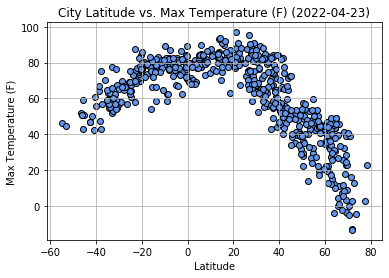

In [10]:
# Create a scatter plot of City Latitude vs. Max_Temp and save the plot as a .png to the Weather_Output directory
x_axis1 = weather_df['Lat']
y_axis1 = weather_df['Max Temp']

plt.scatter(x_axis1, y_axis1, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature (F) ({today})', fontsize = 12)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Max Temperature.png')

plt.show()

### Observations:

* This graph plots city latitude against max temperature. 
* The plot shows cities closer to the equator (latitude 0 degrees) have higher max temperatures than those cities further from the equator. 
* In other words, the plot confirms our initial hypothesis that the weather gets hotter as we move closer to the equator.

### Latitude vs. Humidity (%)

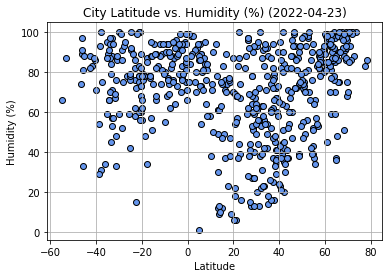

In [11]:
# Create a scatter plot of City Latitude vs. Humidity and save the plot as a .png to the Weather_Output directory
x_axis2 = weather_df['Lat']
y_axis2 = weather_df['Humidity']

plt.scatter(x_axis2, y_axis2, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity (%) ({today})', fontsize = 12)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Humidity.png')

plt.show()

### Observations:

* This graph plots city latitude against humidity levels. 
* There does not appear to be a strong relationship between city latitude and humidity levels. However, there does appear to be some clustering in the middle-left and upper-right corner of the plot.

### Latitude vs. Cloudiness (%)

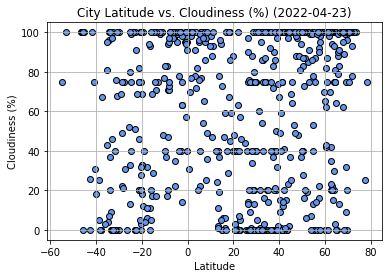

In [12]:
# Create a scatter plot of City Latitude vs. Cloudiness and save the plot as a .png to the Weather_Output directory
x_axis3 = weather_df['Lat']
y_axis3 = weather_df['Cloudiness']

plt.scatter(x_axis3, y_axis3, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness (%) ({today})', fontsize = 12)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Cloudiness.png')

plt.show()

### Observations:

* This graph plots city latitude against cloudiness %.
* Based on how scattered the plot is, there does not appear to be a strong relationship between city latitude and cloudiness levels.

### Latitude vs. Wind Speed (mph)

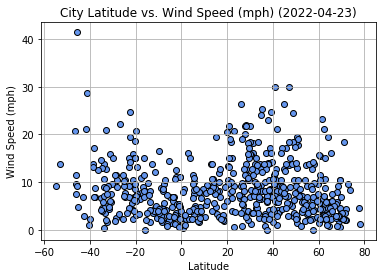

In [13]:
# Create a scatter plot of City Latitude vs. Cloudiness and save the plot as a .png to the Weather_Output directory
x_axis4 = weather_df['Lat']
y_axis4 = weather_df['Wind Speed']

plt.scatter(x_axis4, y_axis4, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed (mph) ({today})', fontsize = 12)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Wind Speed.png')

plt.show()

### Observations

* This graph plots city latitude against wind speed. 
* Based on how scattered the plot is, there does not appear to be a strong relationship between city latitude and wind speed. However, the plot does show some clustering at the bottom, indicating wind speed rarely goes above 25 mph in the cities selected.

## Linear Regression

In [14]:
# Create a Northern Hemisphere DataFrame
northern_hemp = weather_df.loc[weather_df['Lat'] >= 0, :]
northern_hemp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,dodge city,37.7528,-100.0171,78.69,16.0,0.0,23.02,US,2022-04-23
5,nome,64.5011,-165.4064,43.16,70.0,75.0,5.75,US,2022-04-23
7,pevek,69.7008,170.3133,8.58,96.0,99.0,3.47,RU,2022-04-23
10,hofn,64.2539,-15.2082,43.39,85.0,3.0,4.54,IS,2022-04-23
11,cherskiy,68.7500,161.3000,17.82,91.0,99.0,1.81,RU,2022-04-23
...,...,...,...,...,...,...,...,...,...
631,vagur,61.4732,-6.8119,44.17,85.0,100.0,23.15,FO,2022-04-23
632,hoima,1.4356,31.3436,68.14,88.0,77.0,1.03,UG,2022-04-23
633,hurghada,27.2574,33.8129,75.24,41.0,0.0,8.05,EG,2022-04-23
634,pinawa,50.1489,-95.8811,38.75,97.0,100.0,14.07,CA,2022-04-23


In [15]:
# Create a Southern Hemisphere DataFrame
southern_hemp = weather_df.loc[weather_df['Lat'] < 0, :]
southern_hemp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,geraldton,-28.7667,114.6000,66.61,52.0,22.0,11.50,AU,2022-04-23
1,ushuaia,-54.8000,-68.3000,46.06,66.0,75.0,9.22,AR,2022-04-23
3,mataura,-46.1927,168.8643,51.48,97.0,100.0,7.43,NZ,2022-04-23
4,bluff,-46.6000,168.3333,51.80,74.0,100.0,20.71,NZ,2022-04-23
6,bredasdorp,-34.5322,20.0403,58.55,66.0,96.0,4.54,ZA,2022-04-23
...,...,...,...,...,...,...,...,...,...
612,taltal,-25.4000,-70.4833,64.00,78.0,33.0,2.30,CL,2022-04-23
615,coihaique,-45.5752,-72.0662,42.75,81.0,100.0,9.22,CL,2022-04-23
621,prabumulih,-3.4500,104.2500,72.81,99.0,100.0,2.73,ID,2022-04-23
623,beloha,-25.1667,45.0500,75.04,79.0,100.0,10.25,MG,2022-04-23


In [16]:
# Define a function for the line regressions to perform on the northern_hemp and southern_hemp dataframes
def linear_regression(x_axis_lreg, y_axis_lreg, x_label, y_label, chart_title, line_eq_x, line_eq_y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_lreg, y_axis_lreg)
    regress_values = x_axis_lreg * slope + intercept
    line_eq = (f'y = {(round(slope,2))}x  + {(round(intercept,2))}')

    plt.scatter(x_axis_lreg, y_axis_lreg, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(chart_title)
    plt.plot(x_axis_lreg, regress_values, 'r')
    plt.annotate(line_eq, (line_eq_x, line_eq_y), fontsize = 12, color = 'red', size = 14)
    plt.show
    
    print(f'The r-square value is: {round(rvalue**2,5)}.')

### Northern Hemisphere - Latitude vs. Temperature (F)

The r-square value is: 0.72155.


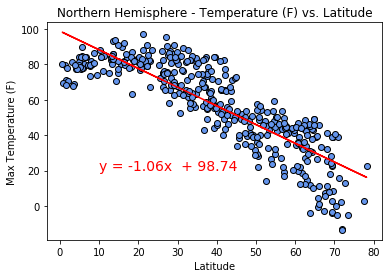

In [17]:
# Using the linear_regression function defined above, plot the linear regression between NH Temperature and Latitude
linear_regression(northern_hemp['Lat'], northern_hemp['Max Temp'], 'Latitude', 'Max Temperature (F)', 
                  'Northern Hemisphere - Temperature (F) vs. Latitude', 10, 20)

### Southern Hemisphere -  Latitude vs. Temperature (F)

The r-square value is: 0.56719.


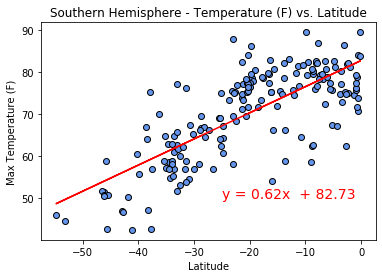

In [18]:
# Using the linear_regression function defined above, plot the linear regression between SH Temperature and Latitude
linear_regression(southern_hemp['Lat'], southern_hemp['Max Temp'], 'Latitude', 'Max Temperature (F)', 
                  'Southern Hemisphere - Temperature (F) vs. Latitude', -25, 50)

### Observations:

* Based on the r-square values:
    * The max temperature of cities in the northern hempishere appear to have a somewhat strong negative correlation with latitude.
    * The max temperature of cities in the southern hempishere appear to have a moderately positive correlation with latitude.
* Overall Conclusion: cities closer to the equator are hotter.

### Northern Hemisphere -  Latitude vs. Humidity (%)

The r-square value is: 0.07905.


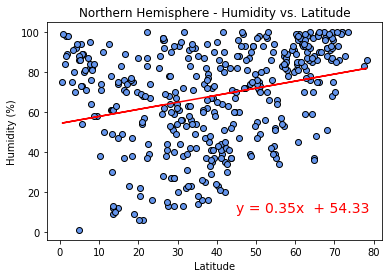

In [19]:
# Using the linear_regression function defined above, plot the linear regression between NH Humidity and Latitude
linear_regression(northern_hemp['Lat'], northern_hemp['Humidity'], 'Latitude', 'Humidity (%)', 
                  'Northern Hemisphere - Humidity vs. Latitude', 45, 10)

### Southern Hemisphere - Latitude vs. Humidity (%)

The r-square value is: 0.03954.


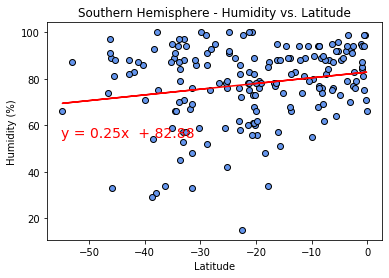

In [20]:
# Using the linear_regression function defined above, plot the linear regression between SH Humidity and Latitude
linear_regression(southern_hemp['Lat'], southern_hemp['Humidity'], 'Latitude', 'Humidity (%)', 
                  'Southern Hemisphere - Humidity vs. Latitude', -55, 55)

### Observations:

* Based on the r-square values:
    * The humidity % of cities in the northern hempishere appear to have a weak positive correlation with latitude.
    * The humidity % of cities in the southern hempishere appear to have a very weak positive correlation with latitude.
* Overall Conclusion: cities closer to the equator are not more or less humid.

### Northern Hemisphere - Latitude vs. Cloudiness (%)

The r-square value is: 0.02495.


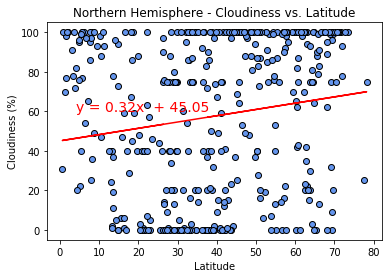

In [21]:
# Using the linear_regression function defined above, plot the linear regression between NH Cloudiness and Latitude
linear_regression(northern_hemp['Lat'], northern_hemp['Cloudiness'], 'Latitude', 'Cloudiness (%)', 
                  'Northern Hemisphere - Cloudiness vs. Latitude', 4, 60)

### Southern Hemisphere - Latitude vs. Cloudiness (%)

The r-square value is: 0.0759.


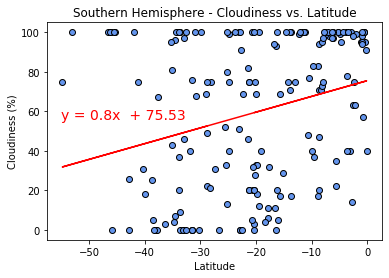

In [22]:
# Using the linear_regression function defined above, plot the linear regression between SH Cloudiness and Latitude
linear_regression(southern_hemp['Lat'], southern_hemp['Cloudiness'], 'Latitude', 'Cloudiness (%)', 
                  'Southern Hemisphere - Cloudiness vs. Latitude', -55, 56)

### Observations:

* Based on the r-square values:
    * The cloudiness % of cities in the northern hempishere appear to have a very weak positive correlation with latitude.
    * The cloudiness % of cities in the southern hempishere appear to have a very weak positive correlation with latitude.
* Overall Conclusion: cities closer to the equator are not more or less cloudy.

### Northern Hemisphere - Latitude vs. Wind Speed (mph)

The r-square value is: 0.01208.


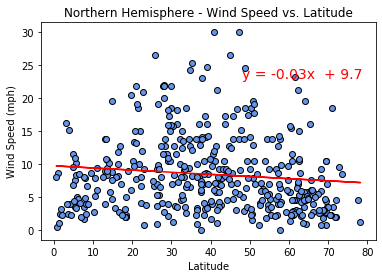

In [23]:
# Using the linear_regression function defined above, plot the linear regression between NH Wind Speed and Latitude
linear_regression(northern_hemp['Lat'], northern_hemp['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 
                  'Northern Hemisphere - Wind Speed vs. Latitude', 48, 23)

### Southern Hemisphere - Latitude vs. Wind Speed (mph) 

The r-square value is: 0.11953.


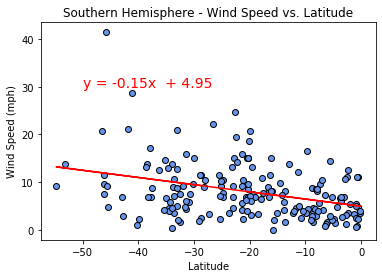

In [24]:
# Using the linear_regression function defined above, plot the linear regression between SH Wind Speed and Latitude
linear_regression(southern_hemp['Lat'], southern_hemp['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 
                  'Southern Hemisphere - Wind Speed vs. Latitude', -50, 30)

### Observations:

* Based on the r-square values:
    * The wind speed of cities in the northern hempishere appear to have a very weak negative correlation with latitude.
    * The wind speed of cities in the southern hempishere appear to have a very weak negative correlation with latitude.
* Overall Conclusion: cities closer to the equator are not more or less windy.